<a href="https://colab.research.google.com/github/esraa-abdelmaksoud/Shai-Training-Notebooks/blob/main/Fashion_MNIST_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attempt to solve Fashion MNIST Dataset using Dense Neural Network
## Bibliography 
* Keras official Tutorial
* Deep Learning with Python by François Chollet

## About DataSet 
**Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.**


In [78]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import os


# Load Dataset and Split it to test and train set

see this link
https://medium.com/the-data-science-publication/how-to-import-and-display-the-fashion-mnist-dataset-using-tensorflow-e72522f684d0

In [79]:
#Getting training and testing data from tensorflow
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

28*28 image pixels

In [80]:
#Training Set shape
X_train_full.shape

(60000, 28, 28)

In [81]:
#Test Set consists of 10000 samples with one label field and 28*28 image pixels
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [82]:
#Labels from 0 to 9 are following Items 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Split training data to train and valid

In [83]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Some images with their labels 

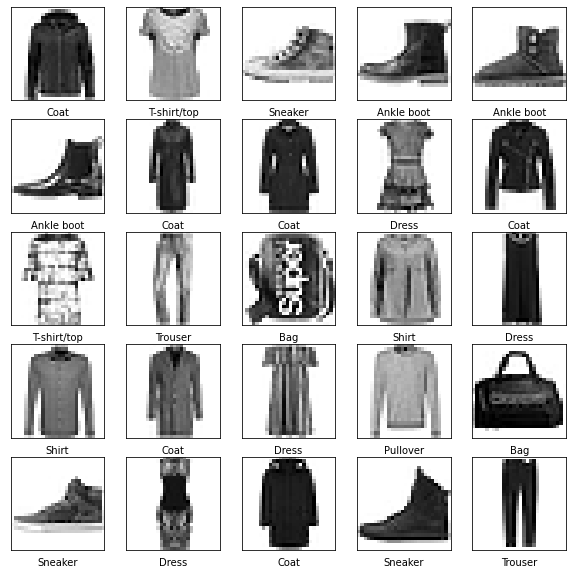

In [84]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(X_train[i]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [85]:
# Rescaling training to range 0 to 1 by dividing them by 255
X_train = X_train / 255.0
# Rescaling validation data too
X_valid = X_valid / 255.0

**Creating a Deep Neural Network with any number of layer you want.**

In [86]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

**Compiling the model.**

In [87]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Training model with a part of training data and evaluating it with another part of training data
and get more than 90% val_acc**

In [88]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1719/1719 [==============================] - 7s 4ms/step - loss: 0.5170 - accuracy: 0.8181 - val_loss: 0.4478 - val_accuracy: 0.8444
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3801 - accuracy: 0.8624 - val_loss: 0.3828 - val_accuracy: 0.8624
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3425 - accuracy: 0.8741 - val_loss: 0.3482 - val_accuracy: 0.8762
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3194 - accuracy: 0.8825 - val_loss: 0.3448 - val_accuracy: 0.8706
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3022 - accuracy: 0.8856 - val_loss: 0.3073 - val_accuracy: 0.8864
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2870 - accuracy: 0.8924 - val_loss: 0.2988 - val_accuracy: 0.8906
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2739 - accuracy: 0.8959 - val_loss: 0.2961 - val_accuracy: 0.8886
Epo

# Visualize Model Training History in Keras

See this link
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

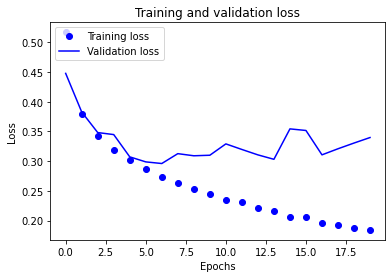

In [89]:
# summarize history for loss
plt.plot(history.history['loss'], marker='o', linewidth=0, color='blue')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Validation loss'], loc='upper left')
plt.show()

# Evaluate the model with our Test Set Using confusion_matrix

-split data to X_test and Y_test
-Rescaling training to range 0 to 1 by dividing them by 255

In [90]:
# Already split earlier to X_test and y_test
X_test = X_test / 255.0

visualization

In [91]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred_arr = np.argmax(y_pred, axis = 1)

313/313 [==============================] - 1s 2ms/step


In [92]:
print(y_pred_arr.shape)
print(y_test.shape)

(10000,)
(10000,)


Text(78.0, 0.5, 'predicted label')

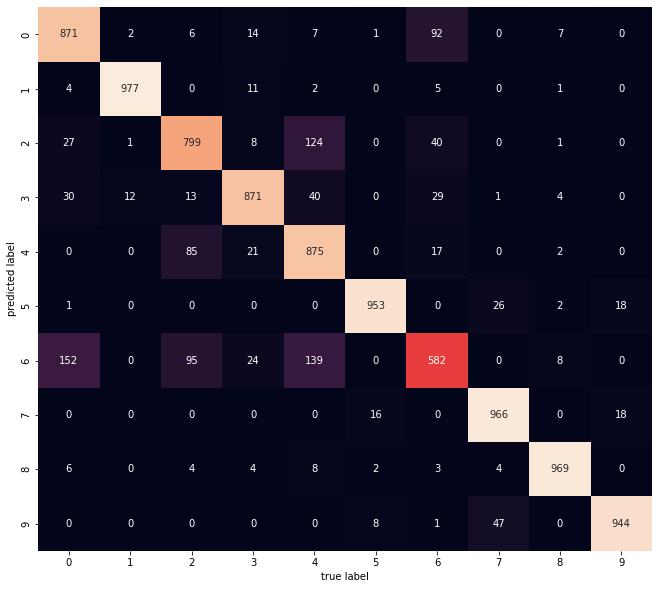

In [93]:
cf_matrix = confusion_matrix(y_test, y_pred_arr)
fig, ax = plt.subplots(figsize=(11,10)) 
sns.heatmap(cf_matrix, cbar=False, annot=True, fmt='g')
plt.xlabel('true label')
plt.ylabel('predicted label')

Find classification_report for the prediction

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_arr, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.87      0.83      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.80      0.80      0.80      1000
       Dress       0.91      0.87      0.89      1000
        Coat       0.73      0.88      0.80      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.76      0.58      0.66      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Use model.evaluate the test data

In [103]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3902 - accuracy: 0.8807


[0.39022496342658997, 0.8806999921798706]